In [2]:
# from mlxtend.plotting import plot_decision_regions
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from scipy.spatial.distance import cdist

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing            # Label Encoder
import math
import random
import operator
import warnings
warnings.filterwarnings('ignore')
import csv

In [3]:
df=pd.read_csv('Nhom07_heart_failure.csv')


# DATA DISCRIBE:



In [4]:
# understanding the data
df.head()
df.shape

(918, 12)

In [5]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
# describe data
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
# check data null 
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

=> Không có giá trị null

# EXPLORE DATA

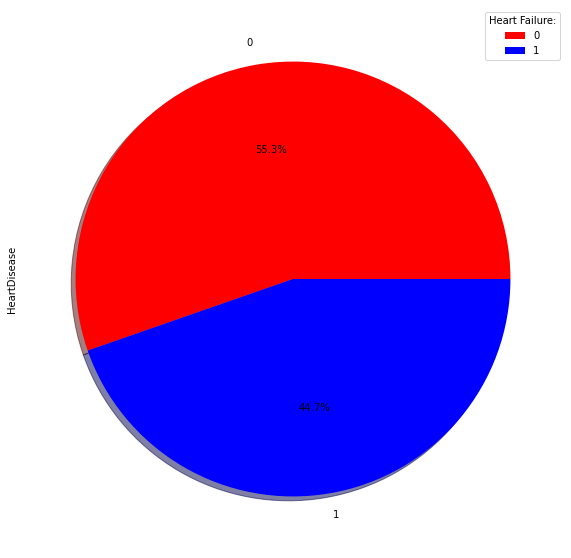

In [8]:
# draw distribution of feature heartdisease
plt.figure(figsize=(10,10))
df['HeartDisease'].value_counts().plot.pie(autopct="%1.1f%%",colors = ( "red", "blue"),labels = df['HeartDisease'].unique(), shadow = True)
plt.legend(title = "Heart Failure:")
plt.show()

=>55,3% số người được quan sát mắc bệnh tim và 44,7% không mắc bệnh trong số tất các bệnh nhân đi khám bệnh

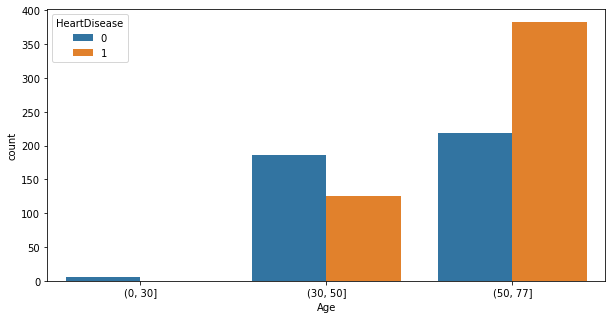

In [9]:
plt.figure(figsize=(10,5))
bins=[0,30,50,77]
sns.countplot(x=pd.cut(df.Age,bins=bins),hue=df.HeartDisease)
plt.show()

=>Người lớn từ 50 tuổi trở lên có nhiều khả năng mắc bệnh tim hơn những người trẻ tuổi

<AxesSubplot:xlabel='Sex', ylabel='count'>

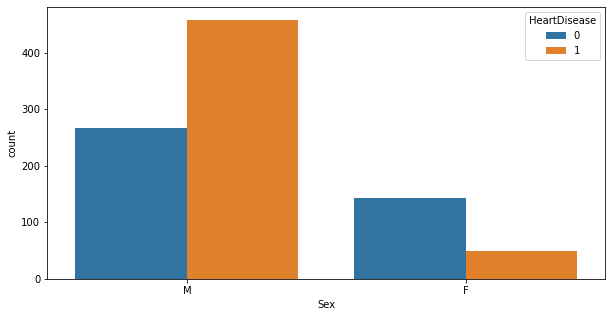

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x="Sex", hue="HeartDisease")


=> Nam giới có nhiều khả năng  mắc bệnh cao hơn nữ giới

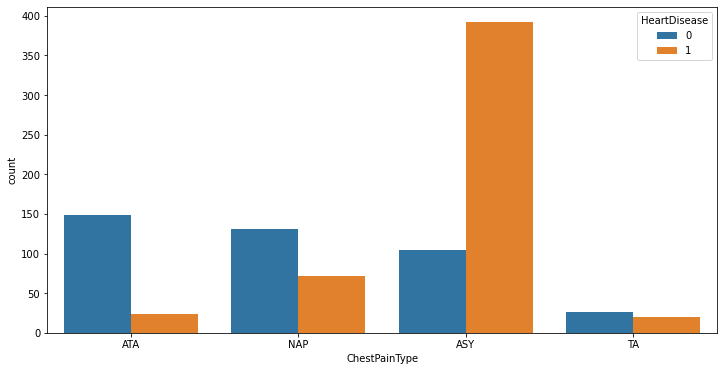

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="ChestPainType", hue="HeartDisease");


- Tỷ lệ suy tim cao nhất có liên quan đến đau ngực kiểu ASY (Không triệu chứng), sau đó đến NAP (Non-anginal pain).
- Loại đau ngực phổ biến nhất ở những người không có bệnh tim là ATA (đau thắt ngực không điển hình) và ít phổ biến nhất là TA (đau thắt ngực điển hình).

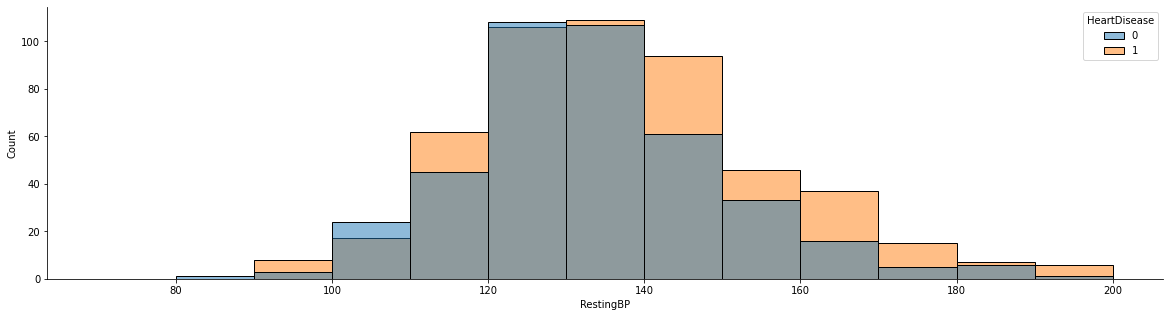

In [12]:
plt.figure(figsize=(20, 5))
bins = [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
sns.histplot(data=df, x="RestingBP",bins=bins, hue="HeartDisease");
sns.despine(top=True, right=True)

=>Hầu hết  bệnh nhân bị bệnh tim có huyết áp lúc nghỉ trong khoảng 130-139, trong khi đối với bệnh nhân bình thường là 120-129

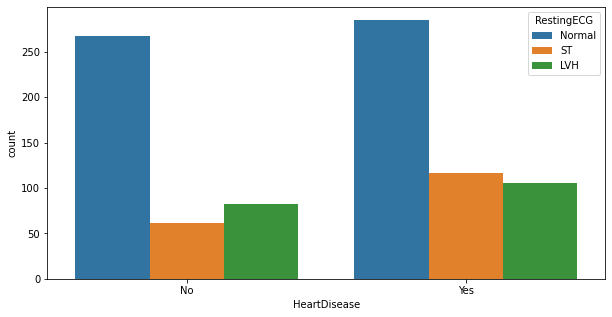

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.HeartDisease,hue=df.RestingECG)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

=>Với kết quả điện tâm đồ ta thấy  số lượng bệnh nhân với tất cả các loại kết quả  điện tâm đồ khi nghỉ ngơi  bị bệnh tim cao hơn 

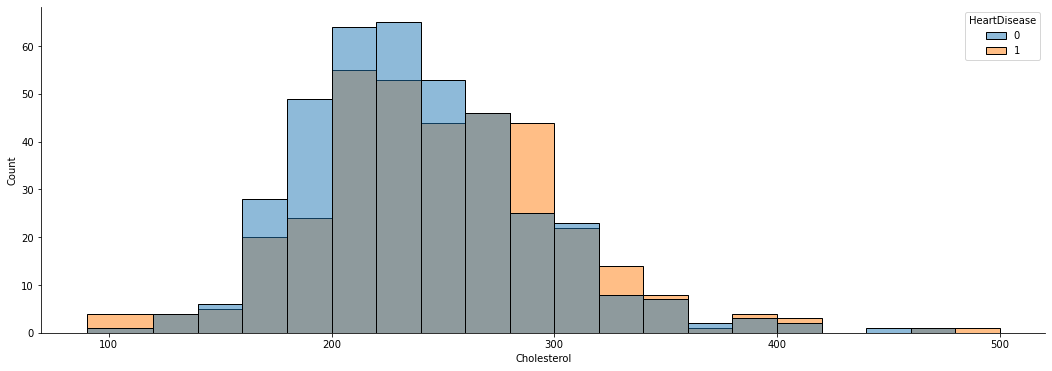

In [14]:
bins = [90, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500]
plt.figure(figsize=(18, 6))
sns.histplot(data=df, x="Cholesterol", bins=bins, hue="HeartDisease");
sns.despine(top=True, right=True)

=>Hầu hết số lượng bệnh nhân bị bệnh tim  có cholesterol trong khoảng 200-219, đối với bệnh nhân bình thường thì khoảng này là 220-239.

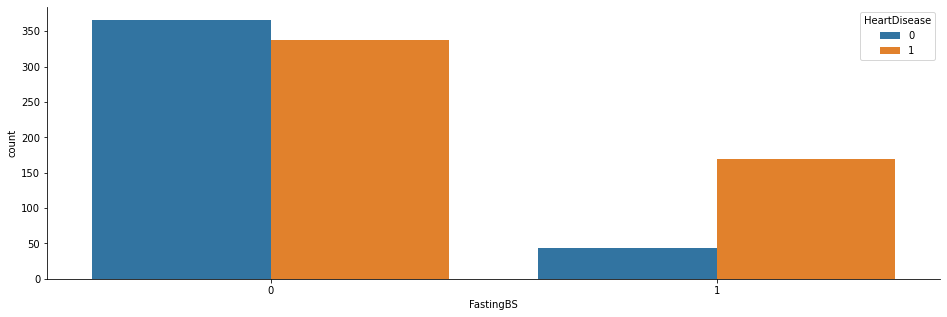

In [15]:
plt.figure(figsize=(16, 5))
sns.countplot(data=df, x="FastingBS", hue="HeartDisease");
sns.despine(top=True, right=True)

=>Hầu hết những ngươì có lượng đường trong máu lúc đói trên 120 mg / dl hầu hết  mắc bệnh tim

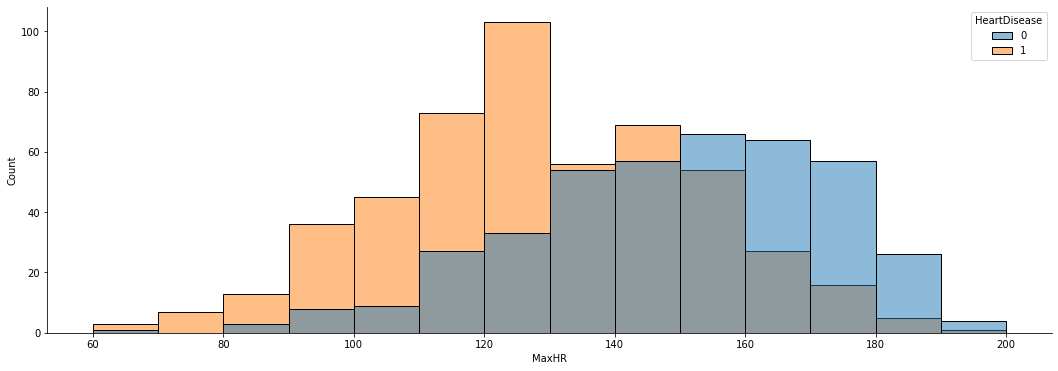

In [16]:
plt.figure(figsize=(18, 6))
bins = [60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
sns.histplot(data=df, x="MaxHR", hue="HeartDisease", bins=bins);
sns.despine(top=True, right=True)

=>Bệnh nhân mắc bệnh tim có nhịp tim tối đa  từ 60 đến 200 trong khi đối với bệnh nhân bình thường là từ 80 đến 200. Bệnh nhân bình thường  có nhịp tim tối đa trung bình cao hơn so với những người bị bệnh tim.Những bệnh nhân bị bệnh tim tối đa có nhịp tim tối đa trong khoảng 120-129.

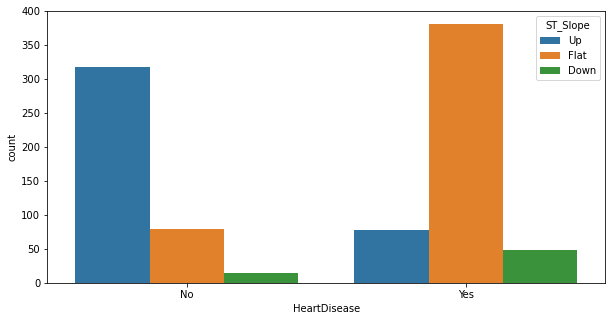

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.HeartDisease,hue=df.ST_Slope)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

=> Độ dốc của Đoạn ST trong kết quả điện tâm đồ của bệnh nhân mắc bệnh tim thì phẳng  là loại phổ biến nhất

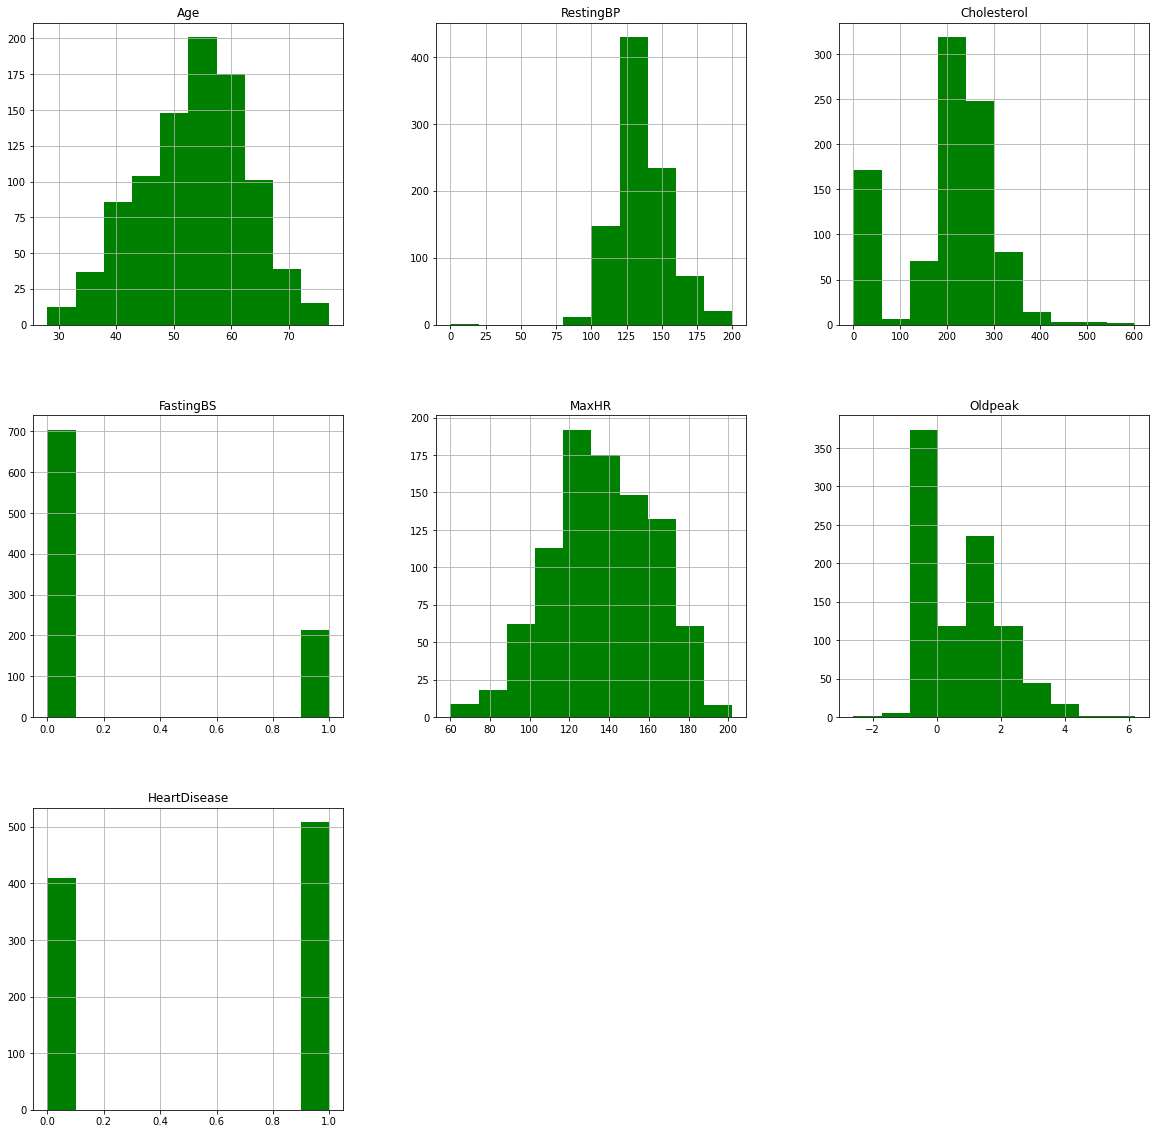

In [18]:
#understanding about data
df.hist(figsize = (20, 20),color='green')
plt.show()

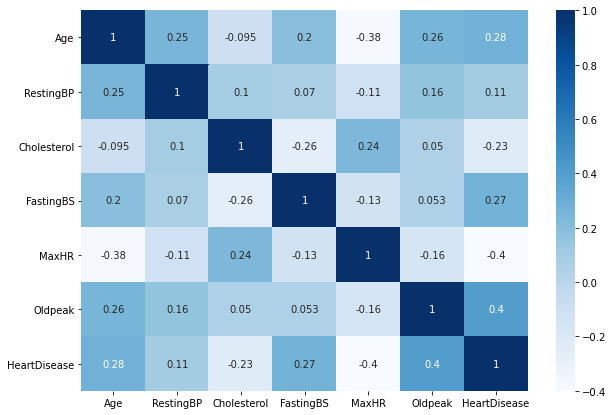

In [19]:
# use heatmap to know correlation of features in dataframe
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.show()

In [20]:
#see which attribute has a strong relationship with heartdisease
cancel_corr = df.corr()["HeartDisease"]
cancel_corr.sort_values(ascending=False)[1:]

Oldpeak        0.403951
Age            0.282039
FastingBS      0.267291
RestingBP      0.107589
Cholesterol   -0.232741
MaxHR         -0.400421
Name: HeartDisease, dtype: float64

In [21]:
# Transform data for build model
df=df.replace({'Sex': {'M':1, 'F':0}})
df=df.replace({'ChestPainType':{'ATA':1,'NAP':2,'ASY':3,'TA':4}})
df=df.replace({'RestingECG':{'Normal':1,'ST':2,'LVH':3}})
df=df.replace({'ExerciseAngina': {'N':0, 'Y':1}})
df=df.replace({'ST_Slope': {'Up':0, 'Flat':1,'Down':3}})

# Generating Model

In [22]:
x=df.iloc[:,[1,3,4,5,7,9]].values
y=df.iloc[:,11].values

# KNN- Scikit-learn


In [23]:
# split data for train, test model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)
print('x_train.shape',x_train.shape)
print('x_test.shape',x_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)


x_train.shape (612, 6)
x_test.shape (306, 6)
y_train.shape (612,)
y_test.shape (306,)


Scaling data

In [24]:
# Scale data
standard= StandardScaler()
x_train=standard.fit_transform(x_train)
x_test=standard.transform(x_test)

Tìm k để có độ chính xác cao

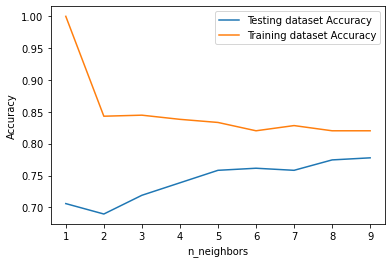

In [25]:
n_neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(n_neighbors))
test_accuracy = np.empty(len(n_neighbors))
  
# Loop over K values
for i, k in enumerate(n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)
  
# Generate plot
plt.plot(n_neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(n_neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

=> Mô hình nên sử dụng với k = 9

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

Accuracy with k=9:77.78%


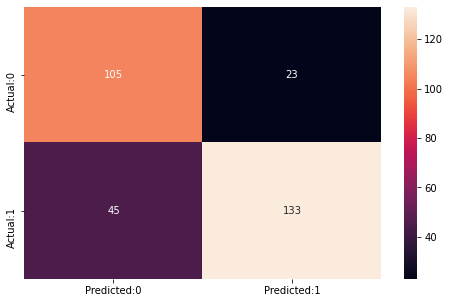

In [27]:
# Evaluate model
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')
from sklearn.metrics import accuracy_score
print("Accuracy with k=9:%.2f%%"%(100*accuracy_score(y_test, y_pred)))

# NBC (Sklearn)

In [33]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

In [34]:
X = pd.get_dummies(X)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,0
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,0
3,48,0,3,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, stratify = y, random_state = 0)

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gaussian Formula

In [37]:
nbc=GaussianNB().fit(X_train, y_train) 
y_pred = nbc.predict(X_test)

nbc_train = round(nbc.score(X_train, y_train) * 100, 2)
nbc_accuracy = round(accuracy_score(y_pred, y_test) * 100, 2)
nbc_f1 = round(f1_score(y_pred, y_test) * 100, 2)

print("Predicted labels :",y_pred[:35])
y=np.array(y_test)
print("Ground truth    : ",y[:35])

# print("Training Accuracy    :",log_train,"%")
# print("Model Accuracy Score :",log_accuracy,"%")
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
print("Classification_Report: \n",classification_report(y_test,y_pred))

Predicted labels : [1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0]
Ground truth    :  [0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0]
Confusion Matrix: 
 [[75 15]
 [23 89]]
Classification_Report: 
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        90
           1       0.86      0.79      0.82       112

    accuracy                           0.81       202
   macro avg       0.81      0.81      0.81       202
weighted avg       0.82      0.81      0.81       202



# NBC (Mathematic)

In [38]:
dt=pd.read_csv('Nhom07_heart_failure.csv')

dt.Sex=dt.Sex.map({'F':0,'M':1})
dt.ChestPainType=dt.ChestPainType.map({'ASY':0,'ATA':1,'NAP':2,'TA':3})
dt.RestingECG=dt.RestingECG.map({'LVH':0,'Normal':1,'ST':2})
dt.ExerciseAngina=dt.ExerciseAngina.map({'N':0,'Y':1})
dt.ST_Slope=dt.ST_Slope.map({'Down':0,'Flat':1,'Up':2})

# dt.to_csv("heart - Copy.csv")
dt.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


In [39]:
# the categorical class names are changed to numberic data
# eg: yes and no encoded to 1 and 0
def encode_class(mydata):
    classes = []
    for i in range(len(mydata)):
        if mydata[i][-1] not in classes:
            classes.append(mydata[i][-1])
    for i in range(len(classes)):
        for j in range(len(mydata)):
            if mydata[j][-1] == classes[i]:
                mydata[j][-1] = i
    return mydata

In [40]:
# Splitting the data
def splitting(mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    # initially testset will have all the dataset
    test = list(mydata)
    while len(train) < train_num:
        # index generated randomly from range 0
        # to length of testset
        index = random.randrange(len(test))
        # from testset, pop data rows and put it in train
        train.append(test.pop(index))
    return train, test

In [41]:
# Group the data rows under each class yes or
# no in dictionary eg: dict[yes] and dict[no]
def groupUnderClass(mydata):
    dict = {}
    for i in range(len(mydata)):
        if (mydata[i][-1] not in dict):
            dict[mydata[i][-1]] = []
        dict[mydata[i][-1]].append(mydata[i])
    return dict

In [42]:
# Calculating Mean
def mean(numbers):
    return sum(numbers) / float(len(numbers))

# Calculating Standard Deviation
def std_dev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)

def MeanAndStdDev(mydata):
    info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)]
    # eg: list = [ [a, b, c], [m, n, o], [x, y, z]]
    # here mean of 1st attribute =(a + m+x), mean of 2nd attribute = (b + n+y)/3
    # delete summaries of last class
    del info[-1]
    return info

In [43]:
# find Mean and Standard Deviation under each class
def MeanAndStdDevForClass(mydata):
    info = {}
    dict = groupUnderClass(mydata)
    for classValue, instances in dict.items():
        info[classValue] = MeanAndStdDev(instances)
    return info


In [44]:
# Calculate Gaussian Probability Density Function
def calculateGaussianProbability(x, mean, stdev):
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * expo


# Calculate Class Probabilities
def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities


In [45]:
# Make prediction - highest probability is the prediction
def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel


# returns predictions for a set of examples
def getPredictions(info, test):
    predictions = []
    for i in range(len(test)):
        result = predict(info, test[i])
        predictions.append(result)
    return predictions

In [46]:
# Accuracy score
def accuracy_rate(test, predictions):
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(test))) * 100.0


In [47]:
# add the data path in your system
filename = r'heart-Copy.csv'


# load the file and store it in mydata list
mydata = list(csv.reader(open(filename, "rt")))
mydata = mydata[1:]
mydata = encode_class(mydata)
for i in range(len(mydata)):
    mydata[i] = [float(x) for x in mydata[i]]

ratio = 0.78
train_data, test_data = splitting(mydata, ratio)
print('Total number of examples are: ', len(mydata))
print('Out of these, training examples are: ', len(train_data))
print("Test examples are: ", len(test_data))

# prepare model
info = MeanAndStdDevForClass(train_data)

# test model
predictions = getPredictions(info, test_data)
accuracy = accuracy_rate(test_data, predictions)
print("Accuracy of your model is: ", accuracy)


Total number of examples are:  918
Out of these, training examples are:  716
Test examples are:  202
Accuracy of your model is:  86.13861386138613
